### Regressão Linear

In [3]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Carregando arquivo 

dados= pd.read_csv('./Arquivos/horasDeEstudo.csv')

#Visualizando informações básicas do dataframe

dados.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [4]:
dados.tail()

,horas_estudo_mes,salario
495,58.0,6259.0
496,34.0,6099.0
497,47.0,6170.0
498,37.0,5064.0
499,29.0,5236.0


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
dados.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [14]:
#Verificar valores nulos
dados.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [15]:
dados.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


Text(0.5, 1.0, 'Sálario X Horas de Estudo')

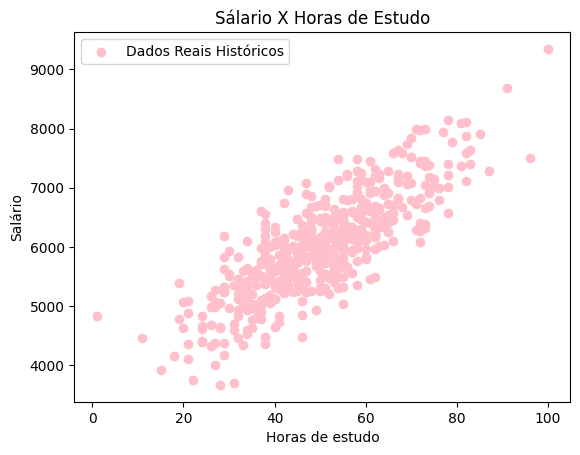

In [31]:
#Criando gráfico de dispersão

plt.scatter(
        data=dados, #Conjunto de dados
        x= 'horas_estudo_mes',
        y= 'salario',
        label= 'Dados Reais Históricos',
        color= 'pink')

plt.xlabel('Horas de estudo')
plt.ylabel('Salário')
plt.legend()
plt.title('Sálario X Horas de Estudo')

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

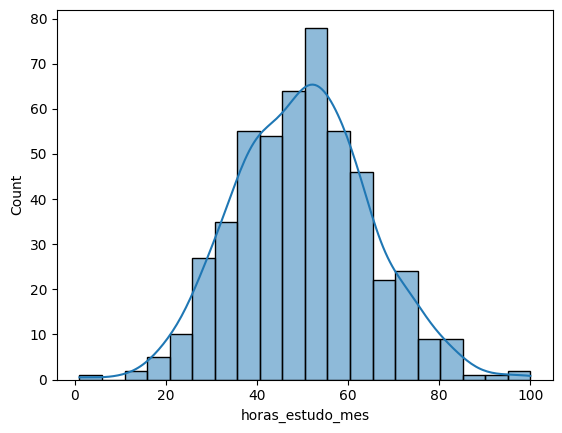

In [34]:
#construir um histograma para analisar o comportamento da variável preditora (X)

sns.histplot(
    data=dados,
    x='horas_estudo_mes',
    kde= True
)


## Preparando os dados

In [55]:
#Separando as variáveis

x= dados['horas_estudo_mes']
y= dados['salario']

#Verificando o tipo de dado e qtde de elementos
print(f'O tipo de dado da variável X é {type(x)}')
print(f'A quantidade de dados da variável X é {len(x)}')

O tipo de dado da variável X é <class 'pandas.core.series.Series'>
A quantidade de dados da variável X é 500


In [56]:
#Converter a variável X para uma matriz 1x1
x=np.array(x)

#np.reshape(Linha,Coluna)
x=x.reshape(-1,1)

x

array([[ 57.],
       [ 48.],
       [ 60.],
       [ 73.],
       [ 46.],
       [ 46.],
       [ 74.],
       [ 62.],
       [ 43.],
       [ 58.],
       [ 43.],
       [ 43.],
       [ 54.],
       [ 21.],
       [ 24.],
       [ 42.],
       [ 35.],
       [ 55.],
       [ 36.],
       [ 29.],
       [ 72.],
       [ 47.],
       [ 51.],
       [ 29.],
       [ 42.],
       [ 52.],
       [ 33.],
       [ 56.],
       [ 41.],
       [ 46.],
       [ 41.],
       [ 78.],
       [ 50.],
       [ 34.],
       [ 62.],
       [ 32.],
       [ 53.],
       [ 21.],
       [ 30.],
       [ 53.],
       [ 61.],
       [ 53.],
       [ 48.],
       [ 45.],
       [ 28.],
       [ 39.],
       [ 43.],
       [ 66.],
       [ 55.],
       [ 24.],
       [ 55.],
       [ 44.],
       [ 40.],
       [ 59.],
       [ 65.],
       [ 64.],
       [ 37.],
       [ 45.],
       [ 55.],
       [ 65.],
       [ 43.],
       [ 47.],
       [ 33.],
       [ 32.],
       [ 62.],
       [ 70.],
       [ 4

In [59]:
#Separação dos dados em treino e teste
x_train, x_test, y_train, y_test= train_test_split(x,y,
                                                   test_size= 0.20,
                                                   random_state=42
                                                   )

print('Qtde de elementos para treino:', len(x_train))

print('Qtde de elementos para teste:', len(x_test))

print('Qtde de elementos total:', len(x))

Qtde de elementos para treino: 400
Qtde de elementos para teste: 100
Qtde de elementos total: 500


# Treinar o modelo

In [61]:
# Inicializar o algortmo para treino 

modelo= LinearRegression()

#Treinar o modelo

modelo.fit(x_train,y_train)

LinearRegression()

In [62]:
#Exibir os coeficientes

print('Coeficiente angular (a):', modelo.coef_)
print('Coeficiente linear (b):', modelo.intercept_)


Coeficiente angular (a): [48.18185277]
Coeficiente linear (b): 3596.783724372753


# Deploy do modelo

In [73]:
#INSERIR OD VALORES PARA PREVISÃO 

entrada= int(input('Digite a qtde de horas dedicadas:'))
horasEstudo= np.array([[entrada]])

#horasEstudo= np.array([[50]])

#Realizar previsão 
salario= modelo.predict(horasEstudo)

#Resultado 
print(f'Para {horasEstudo[0][0]} horas aplicadas ao estudo' +
      f'tem uma possibilidade de você ter um salário aproximadamente de {round(salario[0],2)}'
      )

Para 25 horas aplicadas ao estudotem uma possibilidade de você ter um salário aproximadamente de 4801.33
